# SWAT's it all about? SAS Viya for Python Users

## Importing Packages into Jupyter

First we need to import the SWAT Python package to give us access to the functionality it provides.

In [2]:
import swat

To gain the full functionality provided by SWAT we need to import the required packages of pandas and matplotlib into the Python session.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Run a connection statement to connect to SAS Viya.

Option 1: Use Python environment variables to prevent plain text passwords being displayed within code.  Each of these Python variables can be set within the SWAT configuration:

In [4]:
sess = swat.CAS(cashost, casport, user, password)

Option 2: For a quick test, the values can be directly typed into the connection statement:

In [ ]:
sess = swat.CAS('sas.server.com', 5570, 'myuser', 'mypassword')

To verify that a connection has been made the serverstatus method gives information about the current server details.

In [5]:
sess.serverstatus()

NOTE: Grid node action status report: 1 nodes, 8 total actions executed.


[About]

 {'CAS': 'Cloud Analytic Services',
  'Copyright': 'Copyright © 2014-2018 SAS Institute Inc. All Rights Reserved.',
  'ServerTime': '2019-03-26T15:35:58Z',
  'System': {'Hostname': 'sasserver',
   'Linux Distribution': 'CentOS release 6.9 (Final)',
   'Model Number': 'x86_64',
   'OS Family': 'LIN X64',
   'OS Name': 'Linux',
   'OS Release': '2.6.32-696.18.7.el6.x86_64',
   'OS Version': '#1 SMP Thu Jan 4 17:31:22 UTC 2018'},
  'Version': '3.04',
  'VersionLong': 'V.03.04M0P07112018',
  'license': {'expires': '11Oct2019:00:00:00',
   'gracePeriod': 45,
   'maxCPUs': 9999,
   'site': 'DEMOCENTER EEC-TRIAL-FULL 8.3.1',
   'siteNum': 70180938,
   'warningPeriod': 45}}

[server]

 Server Status
 
    nodes  actions
 0      1        8

[nodestatus]

 Node Status
 
                      name        role  uptime  running  stalled
 0  sasserver.demo.sas.com  controller   3.615        0        0

+ Elapsed: 0.001s, sys: 0.001s, mem: 0.295mb

# Load a CAS Action set

SWAT enables Python users to gain access to some pre-loaded CAS action sets.  It is also possible to load additional action sets into the Python session to gain access to their functionality.  The ‘simple’ CAS action set gives access to the Python methods summary, frequencies and crosstabs.  

In [6]:
sess.loadactionset(actionset='simple')

NOTE: Added action set 'simple'.


[actionset]

 'simple'

+ Elapsed: 0.000483s, mem: 0.194mb

# Upload some data

Load the CSV file from a location on the SAS Viya server into a private CAS library.

In [7]:
castbl = sess.upload_file(data='/home/carrie.foreman/Jupyter_Saved_Work/StudentsPerformance.csv', 
                          casout=dict(name='StudentsPerformance', caslib='casuser'))

NOTE: Cloud Analytic Services made the uploaded file available as table STUDENTSPERFORMANCE in caslib CASUSER(carrie.foreman@amadeus.co.uk).
NOTE: The table STUDENTSPERFORMANCE has been created in caslib CASUSER(carrie.foreman@amadeus.co.uk) from binary data uploaded to Cloud Analytic Services.


These quick cleaning steps are not essential and are used to simplify the data only.

In [8]:
castbl["gender"].replace("male","M",inplace=True)
castbl["gender"].replace("female","F",inplace=True)
castbl["test preparation course"].replace("completed",1,inplace=True)
castbl["test preparation course"].replace("none",0,inplace=True)

CASColumn('STUDENTSPERFORMANCE', caslib='CASUSER(carrie.foreman@amadeus.co.uk)')['test preparation course']

View the data that has been loaded into CAS.

In [9]:
castbl.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,F,group B,bachelor's degree,standard,0,72.0,72.0,74.0
1,F,group C,some college,standard,1,69.0,90.0,88.0
2,F,group B,master's degree,standard,0,90.0,95.0,NaN
3,M,group A,associate's degree,free/reduced,0,47.0,57.0,44.0
4,M,group C,some college,standard,0,76.0,78.0,75.0
5,F,group B,associate's degree,standard,0,71.0,83.0,78.0
6,F,group B,some college,standard,1,88.0,95.0,92.0
7,M,group B,some college,free/reduced,0,40.0,43.0,39.0
8,M,group D,high school,free/reduced,1,64.0,64.0,67.0
9,F,group B,high school,free/reduced,0,38.0,60.0,50.0


# Exploration

To perform an initial data exploration, Python contains many packages and libraries with different capabilities.  In this section, SWAT will be used to explore the data.  SWAT can be used to create visualizations of the data to view any distributions which may be present.  

## Histograms

Histograms are a great way to view the distribution of any numeric variables within a data set.  They can be used to identify any issues or outliers in the data.  To create a histogram of all numeric variables within the CAS table the Python hist method can be used.  

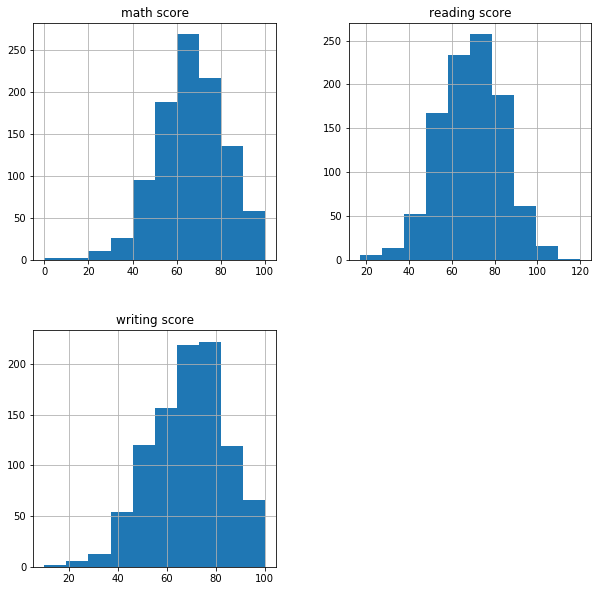

In [10]:
castbl.hist(figsize=(10,10))
plt.show()

## Identifying Missing Values

Missing values can cause issues with some data visualization techniques or data science models.  To prevent this, it is important that a programmer addresses these issues during the data manipulation stage.  Within Python, the info method can be used to provide information on the CAS table.  This includes information on whether missing values are present for each variable.  

In [11]:
castbl.info()

CASTable('STUDENTSPERFORMANCE', caslib='CASUSER(carrie.foreman@amadeus.co.uk)')
Data columns (total 8 columns):
                                N   Miss     Type
gender                       1000  False  varchar
race/ethnicity               1000  False  varchar
parental level of education  1000  False  varchar
lunch                        1000  False  varchar
test preparation course      1000  False  varchar
math score                   1000  False   double
reading score                 994   True   double
writing score                 978   True   double
dtypes: double(3), varchar(5)
data size: 137039
vardata size: 33039
memory usage: 137072


# Data Manipulation

Once the data has been explored and issues have been identified, we need to rectify these.  This can be completed during the data manipulation stage.

## Modifying Incorrect Data

In the exploration stage, we identified than an individual had scored approximately 120 in their reading exam.  We first need to identify the observation where this score has been recorded.  To identify this the head method can be used on a subset of the CAS Table.  

In [12]:
castbl[castbl['reading score']>100].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,F,group B,master's degree,free/reduced,1,77.0,120.0,94.0


Once the observation has been identified, we need to decide what we would like to do with this outlier.  There are many ways of dealing with outliers including replacing the value or removing the observation.  For this record we will temporarily replace the value of the reading score to a null value, which will be handled in the next section.

In [13]:
castbl['reading score'].replace(120, pd.np.nan, inplace=True)

CASColumn('STUDENTSPERFORMANCE', caslib='CASUSER(carrie.foreman@amadeus.co.uk)')['reading score']

We then need to check that the incorrect data has been removed.

In [14]:
castbl[castbl['reading score']>100].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,nan


# Imputing Missing Values

Many Python methods are available to remove, replace or impute missing values within the data set.  In this example, we would like to impute any missing values within the CAS table using the median value.  

In [15]:
castbl.fillna(castbl.median(), inplace=True)

To verify that this has taken effect we can run the info method on the CAS table.

In [16]:
castbl.info()

CASTable('STUDENTSPERFORMANCE', caslib='CASUSER(carrie.foreman@amadeus.co.uk)')
Data columns (total 9 columns):
                                N   Miss     Type
gender                       1000  False  varchar
race/ethnicity               1000  False  varchar
parental level of education  1000  False  varchar
lunch                        1000  False  varchar
test preparation course      1000  False  varchar
math score                   1000  False   double
reading score                1000  False   double
writing score                1000  False   double
nan                             0   True   double
dtypes: double(4), varchar(5)
data size: 145039
vardata size: 33039
memory usage: 145072


# Combining Categories

The parental level of education variable contains six categories.  The users have identified that the category “Some high school” was a mistake and should be combined with the “High school” category.  To view a list of the categories which are included within the CAS table the summary method can be used.  Adding a groupby option allows us to view statistics for each category which is present within the CAS table.

In [17]:
castbl['math score'].groupby(['parental level of education']).summary(subset=['n']).concat_bygroups()

,Column,N
parental level of education,,
associate's degree,math score,222.0
bachelor's degree,math score,118.0
high school,math score,196.0
master's degree,math score,59.0
some college,math score,226.0
some high school,math score,179.0


The output shows that 196 students have a parent categorized as ‘high school’, and 179 students have ‘some high school’ which need to be combined.  This can be completed within Python code using a replace method on the column parental level of education.  

In [18]:
castbl['parental level of education'].replace('some high school', 'high school', inplace=True)

CASColumn('STUDENTSPERFORMANCE', caslib='CASUSER(carrie.foreman@amadeus.co.uk)')['parental level of education']

Check that the category has been replaced.

In [19]:
castbl['math score'].groupby(['parental level of education']).summary(subset=['n']).concat_bygroups()

,Column,N
parental level of education,,
associate's degree,math score,222.0
bachelor's degree,math score,118.0
high school,math score,375.0
master's degree,math score,59.0
some college,math score,226.0


# Promoting to the Public CAS library

Once the data manipulation is completed we can promote the data to the public CAS library.  This allows the data to be accessible by all users who have an active CAS session, including users within SAS Studio and SAS Viya web applications as well as those within Python.

In [20]:
sess.promote(name=castbl, targetlib='public', target='STUDENTMODIFIED')

+ Elapsed: 0.00137s, sys: 0.002s, mem: 0.305mb

The fileinfo method can be used to identify a list of tables which are currently available in a CAS library.  This method lists information about the files which are available including the permissions, owner, group and size of each file. 

In [21]:
sess.fileinfo(caslib='public')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,cas,sas,dispersionzicmp_va.sashdat,103008,NONE,2018-07-18T21:16:59-04:00,1.847582e+09
1,-rwxr-xr-x,cas,sas,USCOUNTYSHAPEFILES.sashdat,13612856,NONE,2018-07-18T21:17:41-04:00,1.847582e+09
2,-rwxr-xr-x,cas,sas,donations.sas7bdat,9568256,,2018-07-18T21:16:59-04:00,1.847582e+09
3,-rwxr-xr-x,cas,sas,MINIMUM.sashdat,8752,NONE,2018-07-18T21:17:14-04:00,1.847582e+09
4,-rwxr-xr-x,cas,sas,articles_va.sashdat,59608,NONE,2018-07-18T21:16:56-04:00,1.847582e+09
5,-rwxr-xr-x,cas,sas,ZIPWLIST4.sashdat,5089904,NONE,2018-07-18T21:17:43-04:00,1.847582e+09
6,-rwxr-xr-x,cas,sas,TICKET_SALES_ZIP_SHAPES.sashdat,1241056,NONE,2018-07-18T21:17:40-04:00,1.847582e+09
7,-rwxr-xr-x,cas,sas,NC_HOUSEPRICE.sashdat,19568,NONE,2018-07-18T21:17:27-04:00,1.847582e+09
8,-rwxr-xr-x,cas,sas,DISPERSIONCMP_VA_Y1.sashdat,8672,NONE,2018-07-18T21:16:59-04:00,1.847582e+09
9,-rwxr-xr-x,cas,sas,RETAIL DATA.sashdat,3832632,NONE,2018-07-18T21:17:34-04:00,1.847582e+09


To work on a CAS table within Python that is available from another CAS library a CASTable statement needs to be run.

In [22]:
casstumod = sess.CASTable(name='STUDENTMODIFIED', caslib='public')

This allows us to use the casstumod Python object to reference the public CAS Table.  To verify that the connection is successful, the info method displays the CAS table name and the CAS library for the CAS table.

In [23]:
casstumod.info()

CASTable('STUDENTMODIFIED', caslib='public')
Data columns (total 9 columns):
                                N   Miss     Type
gender                       1000  False  varchar
race/ethnicity               1000  False  varchar
parental level of education  1000  False  varchar
lunch                        1000  False  varchar
test preparation course      1000  False  varchar
math score                   1000  False   double
reading score                1000  False   double
writing score                1000  False   double
nan                             0   True   double
dtypes: double(4), varchar(5)
data size: 144144
vardata size: 32144
memory usage: 0


# Data Visualization

Python contains many methods to create visualizations and models using Python packages.  All visualizations within this section are completed using CAS actions which are available through SWAT and matplotlib functionality.

## Box Plot

To create a box plot within Python the boxplot method can be used on the public CAS table.  This has a required argument to provide the column which is to be used for the analysis.  

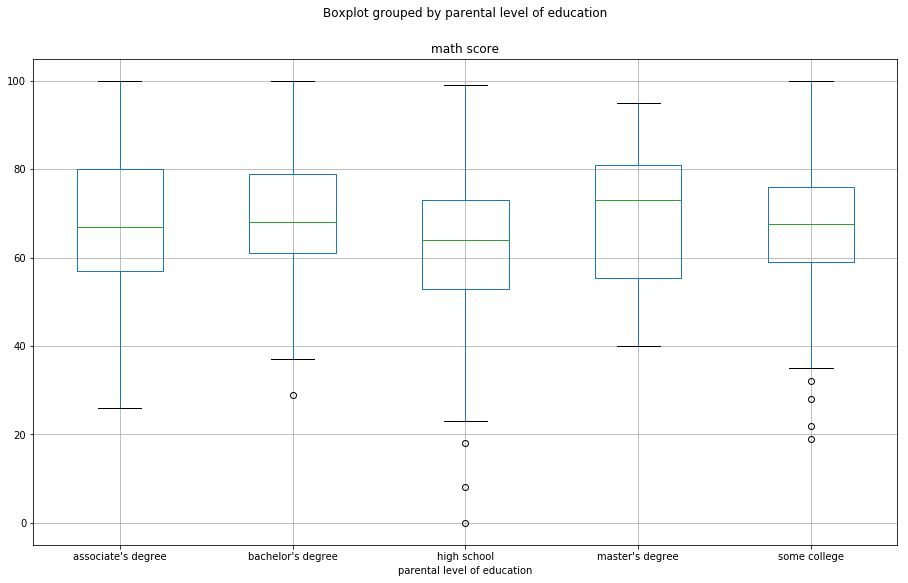

In [24]:
casstumod.boxplot(column='math score', by='parental level of education', figsize=(15,9))
plt.show()

As the default box plots created are not the most visually appealing, a range of options are available to Python users.  Options can be added using patch_artist, which allows users to modify the coloring and line widths of the box plots.  In the following example the linewidth has been increased.  Including the patch_artist option fills the background of the box in, making the box plot stand out more from the axis.  It is also possible to add a custom title to the chart using the suptitle option.

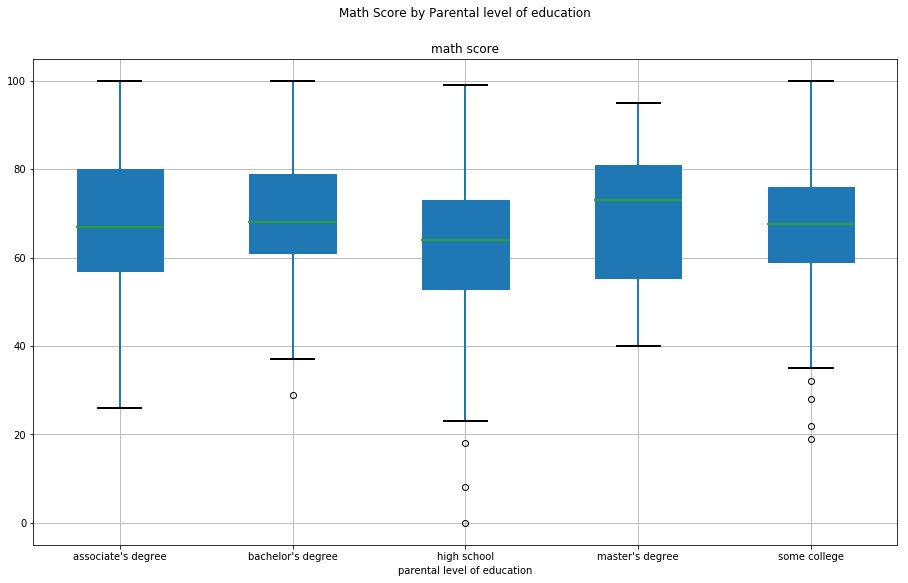

In [25]:
casstumod.boxplot(column='math score', by='parental level of education', patch_artist=True, capprops=dict(linewidth=2), 
               whiskerprops=dict(linewidth=2), medianprops=dict(linewidth=2), figsize=(15,9))
plt.suptitle('Math Score by Parental level of education')
plt.show()

## Scatter Plot 

To create a scatter plot within Python the plot method is used on the CAS table.  The syntax includes an x-axis variable, y-axis variable and the type of plot which we would like to create.  In addition to this, options have been added to choose a color for the plot and figsize to increase the size of the plot.  Finally, a title can be added.  

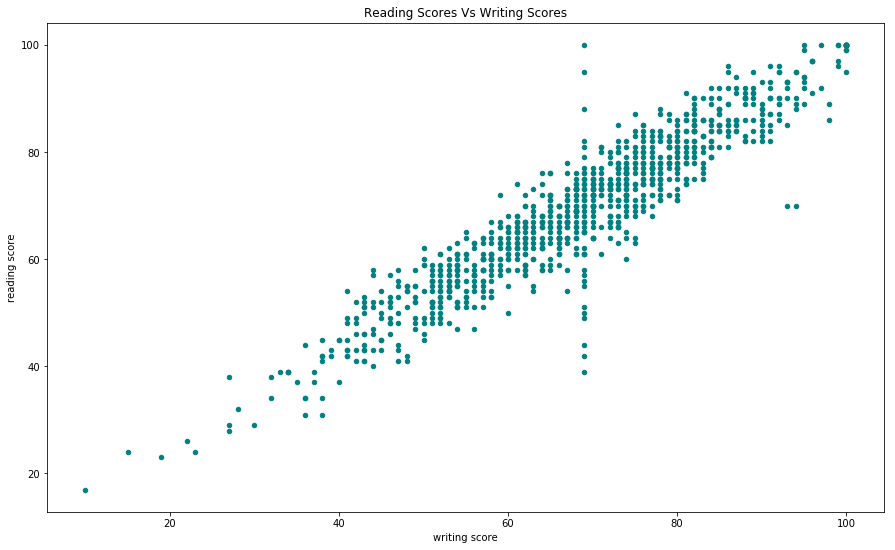

In [26]:
casstumod.plot(x='writing score', y='reading score', kind='scatter', figsize=(15,9), color='teal', )
plt.title('Reading Scores Vs Writing Scores')
plt.show()

In [27]:
sess.terminate()